In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, f1_score, accuracy_score , precision_score, recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [19]:
#df=pd.read_csv('./dataset/Encoded.csv')
df = pd.read_csv('./dataset/Encoded_binary.csv')
df.shape

(68100, 44)

In [3]:
df['readmitted'].value_counts() 

0    34050
1    34050
Name: readmitted, dtype: int64

In [4]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

[[4 0 6 ... 0 0 1]
 [2 0 4 ... 0 0 1]
 [2 1 5 ... 0 1 1]
 ...
 [4 0 7 ... 0 1 1]
 [0 0 7 ... 0 0 1]
 [0 1 8 ... 0 0 1]]
[0 0 0 ... 1 1 1]


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Test case function**

In [6]:
def test_model(model):
    li_score={}
    # Predict probabilities for test set
    y_prob = model.predict_proba(X_test)[:,1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print('ROC AUC Score:', roc_auc)
   
    
    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print('F1 Score:', f1)
    


    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)
    


    # calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('Precision:', precision)
    print('Recall:', recall)

    li_score.update({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'f1_score':f1,'ROC score':roc_auc}) 
    
    
    cm = confusion_matrix(y_test, y_pred)
    # plot confusion matrix
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel("Predicted as readmitted")
    plt.ylabel("Actually readmitted")
    plt.show()
    
    return(li_score)

**LOGISTIC REGRESSION**

In [7]:
#Changing the model a bit
from sklearn.linear_model import LogisticRegression
lg_new=LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42)
lg_new.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

ROC AUC Score: 0.6103711692698733
F1 Score: 0.5614061786638259
Accuracy Score: 0.576798825256975
Precision: 0.5929914804693779
Recall: 0.5330154601936137


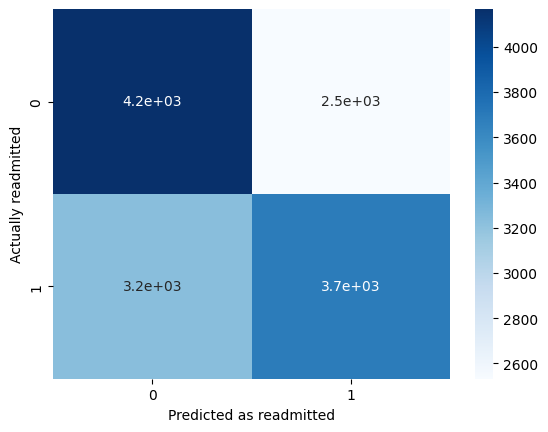

In [8]:
Log_R=test_model(lg_new)

**Random forest**

In [9]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

ROC AUC Score: 0.6019961617020045
F1 Score: 0.5738939670932358
Accuracy Score: 0.5721732745961821
Precision: 0.5809890435297601
Recall: 0.5669700910273082


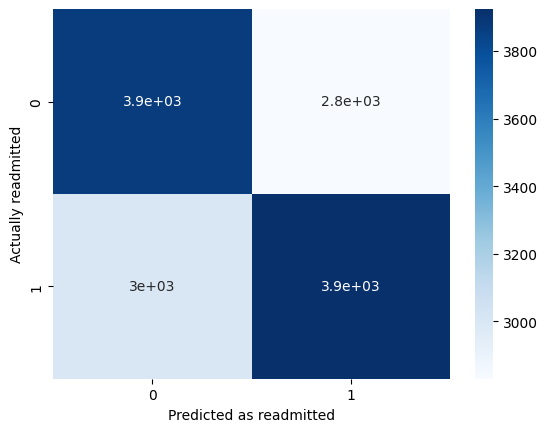

In [10]:
Rand_forest=test_model(rm)

In [11]:
print(rm.feature_importances_)

[2.61504679e-02 1.85295227e-02 5.83257677e-02 3.31618306e-02
 4.41594245e-02 3.37732115e-02 7.00106705e-02 1.16405806e-01
 4.42673541e-02 9.70828525e-02 2.57749459e-02 2.00785505e-02
 5.15494763e-02 5.63529994e-02 5.22276399e-02 4.76440220e-02
 5.38724038e-02 8.56773575e-03 1.99345534e-02 1.39248743e-02
 4.47508520e-03 2.87888468e-03 5.80868692e-04 9.12367498e-03
 1.09120580e-05 1.35318959e-02 1.29845615e-02 9.97160212e-05
 1.13294815e-02 1.06025491e-02 1.31847441e-03 2.08641499e-04
 7.91778112e-06 1.92921771e-04 1.41351553e-02 2.74873139e-03
 1.57557530e-05 6.88407428e-06 0.00000000e+00 0.00000000e+00
 1.31638609e-02 1.07899182e-02]


**Decision tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

ROC AUC Score: 0.5502646473230752
F1 Score: 0.5322220568536986
Accuracy Score: 0.5384728340675478
Precision: 0.5487187356145465
Recall: 0.516688339835284


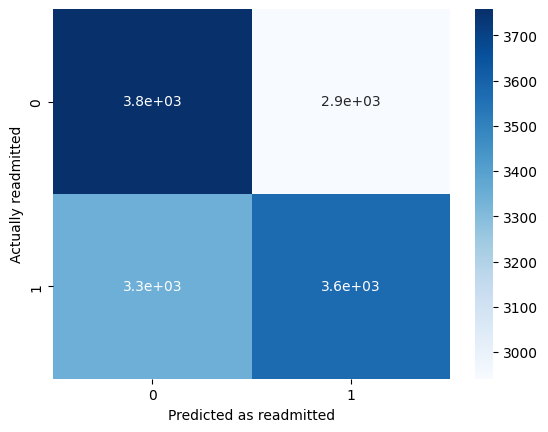

In [13]:
d_tree=test_model(dtree)

**GRADIENT BOOSTING**

In [14]:
import xgboost
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

ROC AUC Score: 0.6346873062266991
F1 Score: 0.6005381426805324
Accuracy Score: 0.5966960352422908
Precision: 0.6045387994143485
Recall: 0.5965900881375524


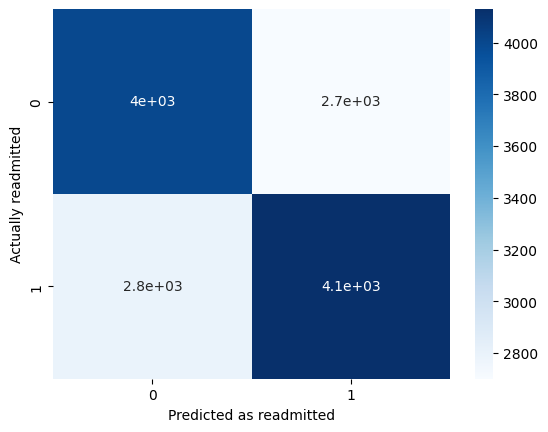

In [15]:
grad_boost=test_model(xgb)

### RESULTS

In [16]:
print(Log_R,Rand_forest,d_tree,grad_boost)
model={
    'LogisticRegression':Log_R,
    'Random forest':Rand_forest,
    'Decision Tree Classifier':d_tree,
    'Gradient Boosting':grad_boost
}

{'Accuracy': 0.576798825256975, 'Precision': 0.5929914804693779, 'Recall': 0.5330154601936137, 'f1_score': 0.5614061786638259, 'ROC score': 0.6103711692698733} {'Accuracy': 0.5721732745961821, 'Precision': 0.5809890435297601, 'Recall': 0.5669700910273082, 'f1_score': 0.5738939670932358, 'ROC score': 0.6019961617020045} {'Accuracy': 0.5384728340675478, 'Precision': 0.5487187356145465, 'Recall': 0.516688339835284, 'f1_score': 0.5322220568536986, 'ROC score': 0.5502646473230752} {'Accuracy': 0.5966960352422908, 'Precision': 0.6045387994143485, 'Recall': 0.5965900881375524, 'f1_score': 0.6005381426805324, 'ROC score': 0.6346873062266991}


In [17]:
def create_metrics_table(metrics_dict):
    df = pd.DataFrame(metrics_dict)
    df = df.transpose()
    df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 score','Roc score']
    df.index.name = 'Model'
    return df

In [18]:
table=create_metrics_table(model)
print(table)

                          Accuracy  Precision    Recall  F1 score  Roc score
Model                                                                       
LogisticRegression        0.576799   0.592991  0.533015  0.561406   0.610371
Random forest             0.572173   0.580989  0.566970  0.573894   0.601996
Decision Tree Classifier  0.538473   0.548719  0.516688  0.532222   0.550265
Gradient Boosting         0.596696   0.604539  0.596590  0.600538   0.634687
